In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
import statsmodels.api as sm

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

/tmp/ipykernel_1649988/2644363921.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
import io
import requests

def read_csv_from_shareable_link(url):
  response = requests.get(url, stream=True)
  if response.status_code == 200:
    csv_file = io.StringIO(response.content.decode('utf-8'))
    return pd.read_csv(csv_file)
  else:
    print('Error reading CSV file from shareable link')

In [5]:
df = read_csv_from_shareable_link("https://drive.google.com/uc?export=download&id=1OPtTgTOIbJDITkJ-MzlhX1pGZ8KYUD-k")

In [6]:
df.head()

,OBS.,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,1,715,0.26,18.0,2.31,0,1.97,6.58,6.2,4.10,1,296.0,15.3,0,0,0
1,2,691,0.28,0.0,7.07,0,3.64,6.42,62.0,2.19,2,242.1,17.8,1,1,1
2,3,822,0.30,0.0,7.07,0,1.67,7.19,84.6,3.65,2,242.0,17.8,1,1,0
3,4,809,0.21,0.0,2.18,0,1.40,7.00,47.2,1.13,3,222.0,18.7,0,0,1
4,5,837,0.26,0.0,2.18,0,0.37,7.15,89.8,3.50,3,222.0,18.7,1,0,1


In [7]:
df.columns 

Index(['OBS.', 'CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'PARK', 'POOL', 'CINEMA'],
      dtype='object')

In [8]:
dataset= df.drop(columns=['OBS.'])

In [9]:
dataset.shape

(1000, 15)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CMEDV    1000 non-null   int64  
 1   CRIM     1000 non-null   float64
 2   ZN       1000 non-null   float64
 3   INDUS    1000 non-null   float64
 4   CHAS     1000 non-null   int64  
 5   NOX      1000 non-null   float64
 6   RM       1000 non-null   float64
 7   AGE      1000 non-null   float64
 8   DIS      1000 non-null   float64
 9   RAD      1000 non-null   int64  
 10  TAX      1000 non-null   float64
 11  PTRATIO  1000 non-null   float64
 12  PARK     1000 non-null   int64  
 13  POOL     1000 non-null   int64  
 14  CINEMA   1000 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 117.3 KB


In [11]:
dataset.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,706.236000,0.458690,10.998500,10.865210,0.074000,3.059140,6.266140,70.500300,3.612240,9.698000,392.565600,18.683200,0.399000,0.330000,0.50000
std,69.644157,0.146198,23.033275,6.086324,0.261902,1.394702,0.544119,23.776112,1.751456,8.839283,147.757376,1.795277,0.489938,0.470448,0.50025
min,525.000000,0.130000,0.000000,0.460000,0.000000,0.000000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.000000,0.000000,0.00000
25%,671.000000,0.357500,0.000000,6.060000,0.000000,2.020000,5.960000,53.800000,2.320000,4.000000,296.000000,17.800000,0.000000,0.000000,0.00000
50%,704.000000,0.440000,0.000000,8.560000,0.000000,2.960000,6.220000,76.700000,3.180000,5.000000,330.000000,19.100000,0.000000,0.000000,0.50000
75%,734.250000,0.550000,12.500000,18.100000,0.000000,3.832500,6.480000,90.700000,4.450000,24.000000,430.000000,20.200000,1.000000,1.000000,1.00000
max,975.000000,0.990000,100.000000,27.740000,1.000000,10.000000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,1.000000,1.000000,1.00000


In [12]:
print('Null values per column : \n', dataset.isnull().sum())

Null values per column : 
 CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
PARK       0
POOL       0
CINEMA     0
dtype: int64


In [13]:
data = dataset.dropna()

In [14]:
dataset.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,706.236000,0.458690,10.998500,10.865210,0.074000,3.059140,6.266140,70.500300,3.612240,9.698000,392.565600,18.683200,0.399000,0.330000,0.50000
std,69.644157,0.146198,23.033275,6.086324,0.261902,1.394702,0.544119,23.776112,1.751456,8.839283,147.757376,1.795277,0.489938,0.470448,0.50025
min,525.000000,0.130000,0.000000,0.460000,0.000000,0.000000,3.560000,2.900000,1.130000,1.000000,187.000000,12.600000,0.000000,0.000000,0.00000
25%,671.000000,0.357500,0.000000,6.060000,0.000000,2.020000,5.960000,53.800000,2.320000,4.000000,296.000000,17.800000,0.000000,0.000000,0.00000
50%,704.000000,0.440000,0.000000,8.560000,0.000000,2.960000,6.220000,76.700000,3.180000,5.000000,330.000000,19.100000,0.000000,0.000000,0.50000
75%,734.250000,0.550000,12.500000,18.100000,0.000000,3.832500,6.480000,90.700000,4.450000,24.000000,430.000000,20.200000,1.000000,1.000000,1.00000
max,975.000000,0.990000,100.000000,27.740000,1.000000,10.000000,8.780000,100.000000,12.130000,24.000000,711.000000,22.000000,1.000000,1.000000,1.00000


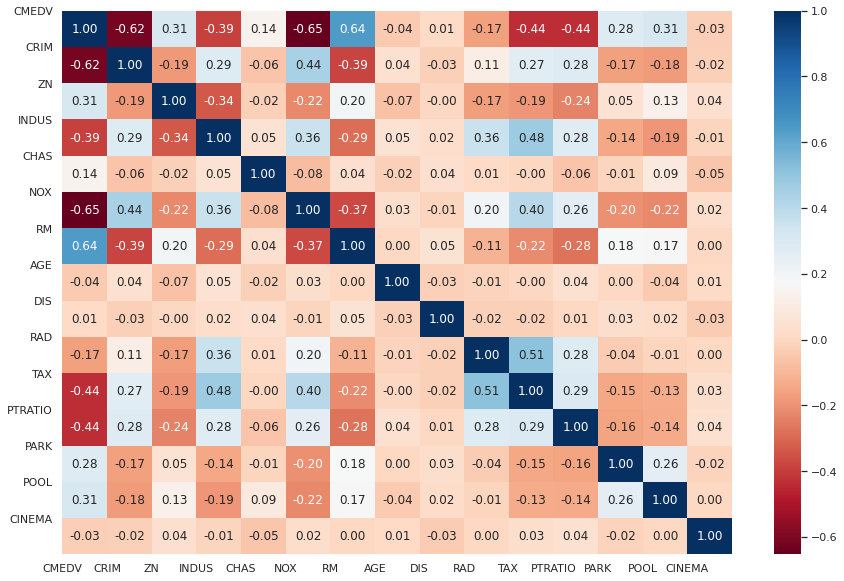

In [80]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.savefig('corr_plot.png')

In [ ]:
sns.pairplot(dataset)
plt.savefig("pairplot.png")

/users-2/billy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


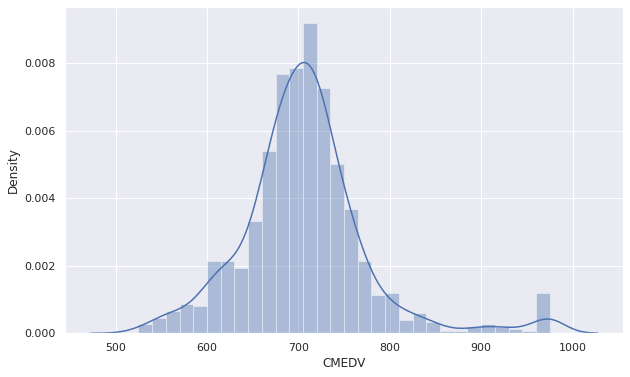

In [82]:
plt.figure(figsize=(10, 6))
sns.distplot(dataset['CMEDV'],bins=30)
plt.savefig("target_distribution")

In [199]:
# # Normalize the features
# for column in dataset.columns:
#     if column != 'CMEDV':
#         dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

# # Normalize the target
# dataset["CMEDV"] = (dataset['CMEDV'] - dataset["CMEDV"].mean()) / dataset["CMEDV"].std()
# # dataset["CMEDV"] = (dataset["CMEDV"] - dataset["CMEDV"].min()) / (dataset["CMEDV"].max() - dataset["CMEDV"].min())

# # Save the normalized data
# dataset.to_csv("normalized_data.csv")

In [15]:
df_normilised = pd.read_csv("normalized_data.csv").drop(columns = ['Unnamed: 0'])

In [16]:
normalised_threshold = (725 - df["CMEDV"].mean()) / df["CMEDV"].std()
# thres =  (750 - df["CMEDV"].min()) / (df["CMEDV"].max() - df["CMEDV"].min())

In [236]:
df_normilised

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
0,0.125840,0.151163,0.18,0.067815,0.0,0.197,0.578544,0.033986,0.270000,0.000000,0.208015,0.287234,0.0,0.0,0.0
1,-0.218769,0.174419,0.00,0.242302,0.0,0.364,0.547893,0.608651,0.096364,0.043478,0.105153,0.553191,1.0,1.0,1.0
2,1.662221,0.197674,0.00,0.242302,0.0,0.167,0.695402,0.841401,0.229091,0.043478,0.104962,0.553191,1.0,1.0,0.0
3,1.475558,0.093023,0.00,0.063050,0.0,0.140,0.659004,0.456231,0.000000,0.086957,0.066794,0.648936,0.0,0.0,1.0
4,1.877602,0.151163,0.00,0.063050,0.0,0.037,0.687739,0.894954,0.215455,0.086957,0.066794,0.648936,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.413014,0.488372,0.20,0.350073,0.0,0.183,0.549808,0.952626,0.417273,0.173913,0.215649,0.510638,0.0,0.0,0.0
996,-0.319280,0.441860,0.00,0.646628,0.0,0.394,0.411877,0.603502,0.082727,1.000000,0.185115,0.808511,0.0,0.0,0.0
997,-0.218769,0.558140,0.28,0.700880,0.0,0.365,0.490421,0.514933,0.035455,0.130435,0.215649,0.808511,0.0,0.0,1.0
998,-0.060823,0.534884,0.00,0.281525,0.0,0.271,0.528736,0.262616,0.242727,0.173913,0.223282,0.808511,0.0,0.0,1.0


In [17]:
normalised_threshold

0.26942676589230646

In [18]:
# thres

In [19]:
df_normilised.describe()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PARK,POOL,CINEMA
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.421085e-16,0.382198,0.109985,0.381423,0.074000,0.305914,0.518418,0.696193,0.225658,0.378174,0.392301,0.647149,0.399000,0.330000,0.50000
std,1.000000e+00,0.169997,0.230333,0.223106,0.261902,0.139470,0.104237,0.244862,0.159223,0.384317,0.281980,0.190987,0.489938,0.470448,0.50025
min,-2.602315e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-5.059434e-01,0.264535,0.000000,0.205279,0.000000,0.202000,0.459770,0.524202,0.108182,0.130435,0.208015,0.553191,0.000000,0.000000,0.00000
50%,-3.210607e-02,0.360465,0.000000,0.296921,0.000000,0.296000,0.509579,0.760041,0.186364,0.173913,0.272901,0.691489,0.000000,0.000000,0.50000
75%,4.022448e-01,0.488372,0.125000,0.646628,0.000000,0.383250,0.559387,0.904222,0.301818,1.000000,0.463740,0.808511,1.000000,1.000000,1.00000
max,3.859103e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [27]:



from sklearn.model_selection import train_test_split

In [28]:
data =df_normilised

In [29]:
X = data.drop(['CMEDV'], axis = 1)
target_value = data['CMEDV']

In [30]:
cat = X.select_dtypes(include='O').keys()
X_new = pd.get_dummies(X, columns = cat, drop_first=True)

In [31]:
# target_value.describe()

In [32]:
print(cat)
print(X_new.shape)

Index([], dtype='object')
(1000, 14)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_new,
                                                    target_value,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                  )

In [34]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7219157364395068
R2_score (train):  0.7552015313825623
R2_score (test):  0.7145356971752794
RMSE:  0.5638697920985226


In [36]:
regressor_linear.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

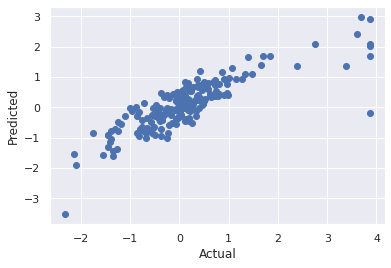

In [216]:
plt.scatter(y_test, y_pred_linear_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



In [37]:
from sklearn.feature_selection import f_regression

In [222]:
# Get the coefficients
coefficients = regressor_linear.coef_

# Get the intercept
intercept = regressor_linear.intercept_

# Print the coefficients
# print("Coefficients:")
# for feature, coefficient in zip(X.columns, coefficients):
#     print(f"{feature}: {coefficient}")

# # Print the intercept
# print("Intercept:", intercept)

# Calculate the p-values
f_values, p_values = f_regression(X_train,y_train)

# # Print the p-values
# print("P-values:")
# for feature, p_value in zip(X.columns, p_values):
#     print(f"{feature}: {p_value}")

In [223]:
# Print the coefficients, t-stats, and p-values
print("Feature\tCoefficient\tT-statistic\tP-value")
for feature, coefficient, p_value in zip(X.columns, coefficients, p_values):
    # Calculate the standard error
    residual_sum_of_squares = np.sum((regressor_linear.predict(X_train) - y_train) ** 2)
    standard_error = np.sqrt(residual_sum_of_squares / (len(y_train) - len(X_train.columns) - 1))
    
    # Calculate the t-statistic
    t_statistic = coefficient / standard_error
    
    print(f"{feature}\t{coefficient:.4f}\t\t{t_statistic:.4f}\t\t{p_value:.4f}")

Feature	Coefficient	T-statistic	P-value
CRIM	-1.4299		-2.9127		0.0000
ZN	0.3631		0.7397		0.0000
INDUS	0.0620		0.1264		0.0000
CHAS	0.2778		0.5658		0.0000
NOX	-2.0339		-4.1430		0.0000
RM	3.1443		6.4049		0.0000
AGE	0.0137		0.0279		0.3000
DIS	-0.0930		-0.1895		0.7099
RAD	0.2334		0.4754		0.0000
TAX	-0.5691		-1.1593		0.0000
PTRATIO	-0.7350		-1.4972		0.0000
PARK	0.1386		0.2823		0.0000
POOL	0.1425		0.2902		0.0000
CINEMA	-0.0461		-0.0940		0.4605


In [224]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Make predictions on the training set
y_pred_train = regressor_linear.predict(X_train)

# Calculate R-squared
r2 = r2_score(y_train, y_pred_train)

# Calculate adjusted R-squared
n = len(y_train)
p = X_train.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_train, y_pred_train)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)

# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.7552015313825623
Adjusted R-squared: 0.7508356988212321
Mean Squared Error (MSE): 0.2364808032485869
Mean Absolute Error (MAE): 0.3432120762404296


In [225]:

# Make predictions on the training set
y_pred_test = regressor_linear.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.7145356971752794
Adjusted R-squared: 0.692932993177733
Mean Squared Error (MSE): 0.3179491424412311
Mean Absolute Error (MAE): 0.3706096394550555


In [227]:
residuals_test = y_test - y_pred_test

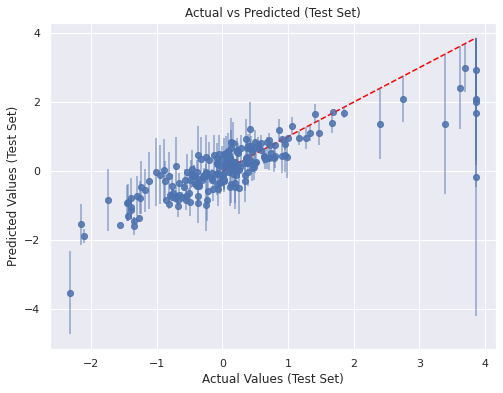

In [228]:
# Plot the actual vs predicted values on the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)

# Add a diagonal line for reference
max_value = max(y_test.max(), y_pred_test.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

# Add error bars on the test set
plt.errorbar(y_test, y_pred_test, yerr=residuals_test, fmt='o', alpha=0.6)

# Set axis labels and title
plt.xlabel("Actual Values (Test Set)")
plt.ylabel("Predicted Values (Test Set)")
plt.title("Actual vs Predicted (Test Set)")

# Show the plot
plt.show()

In [229]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred_test)

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred_test)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Model Performance on Test Set:")
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Model Performance on Test Set:
R-squared: 0.7145356971752794
Adjusted R-squared: 0.692932993177733
Mean Squared Error (MSE): 0.3179491424412311
Mean Absolute Error (MAE): 0.3706096394550555


Model Performance on Test Set:
R-squared: 0.715
Adjusted R-squared: 0.693
Mean Squared Error (MSE): 0.318
Mean Absolute Error (MAE): 0.371

Model Performance on Training Set:
R-squared: 0.755
Adjusted R-squared: 0.751
Mean Squared Error (MSE): 0.236
Mean Absolute Error (MAE): 0.343

The R-squared value represents the proportion of the variance in the target variable that can be explained by the model. In the case of the test set, the R-squared is 0.715, indicating that approximately 71.5% of the variance in the target variable can be explained by the features in the model.

The Adjusted R-squared takes into account the number of features and the sample size to provide a more conservative estimate of the model's performance. The Adjusted R-squared for the test set is 0.693, which considers the complexity of the model and penalizes overfitting.

The Mean Squared Error (MSE) represents the average of the squared differences between the predicted and actual values. A lower MSE indicates better model performance. In this case, the MSE on the test set is 0.318.

The Mean Absolute Error (MAE) represents the average of the absolute differences between the predicted and actual values. It provides a measure of the average magnitude of the errors. A lower MAE indicates better model performance. In this case, the MAE on the test set is 0.371.

Overall, the model shows reasonably good performance on both the training and test sets. It explains a significant portion of the variance in the target variable, as indicated by the R-squared values. The mean squared error and mean absolute error are relatively low, suggesting that the model's predictions are close to the actual values. However, it's important to interpret these results in the context of the specific problem and domain knowledge.


Cinama and age, and DIS.. have higher p-values and rest have p values cost to zero, passing the null hypotesis test and their t-stat is hight that 1.96 (comment on this)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
y_test_classification = [1 if price > normalised_threshold else 0 for price in y_test]

In [ ]:
y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test]
y_test_classification = [1 if price > normalised_threshold else 0 for price in y_test]

# Calculate classification accuracy
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification)

# Print the classification accuracy and confusion matrix
print("Classification Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Text(0.5, 21.5, 'Predicted label')

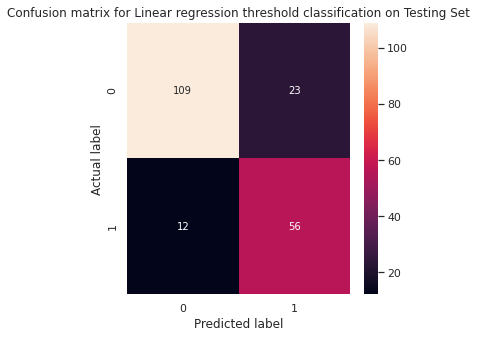

In [258]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format('Linear regression threshold classification on Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [255]:
(np.array(y_test_classification)=='low').sum()

132

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
# Calculate accuracy
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)

# Calculate precision
precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate recall
recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate F1 score
f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_classification, np.array(y_pred_test_classification)==1)

# Calculate Matthews correlation coefficient
mcc = matthews_corrcoef(y_test_classification, y_pred_test_classification)

# Print the additional metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Matthews Correlation Coefficient:", mcc)

Accuracy: 0.825
Precision: 0.7088607594936709
Recall: 0.8235294117647058
F1 Score: 0.761904761904762
ROC AUC Score: 0.8246434937611408
Matthews Correlation Coefficient: 0.6291756266483216


Accuracy: 0.825

The accuracy score represents the overall correctness of the classification. In this case, the model achieves an accuracy of 82.5%, indicating that approximately 82.5% of the predictions made by the model match the actual labels in the test dataset.
Precision: 0.7088607594936709

Precision measures the proportion of correctly predicted high median house prices (positive class) out of the total predicted high prices. A precision score of 0.708 implies that out of all the instances predicted as high median house prices, approximately 70.89% of them are correctly classified.
Recall: 0.8235294117647058

Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted high median house prices out of the actual high prices. A recall score of 0.823 suggests that the model captures approximately 82.35% of the actual high median house prices.
F1 Score: 0.761904761904762

The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1 score of 0.762 indicates a trade-off between precision and recall, taking into account both the ability to correctly identify high median house prices and the ability to avoid false positives.
ROC AUC Score: 0.8246434937611408

The ROC AUC (Receiver Operating Characteristic Area Under Curve) score represents the model's ability to distinguish between high and low median house prices. A score of 0.825 suggests that the model performs well in distinguishing between the two classes, with an area under the ROC curve of approximately 82.46%.
Matthews Correlation Coefficient: 0.6291756266483216

The Matthews correlation coefficient (MCC) takes into account true positives, true negatives, false positives, and false negatives, providing an overall measure of classification performance. A MCC score of 0.629 indicates a moderate level of agreement between the predicted and actual classifications.
Overall, the results suggest that the model has reasonably good performance, with relatively high accuracy, precision, recall, F1 score, and ROC AUC score. However, it's important to consider the specific problem and context to fully interpret the meaning and significance of these metrics.

In [266]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [38]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create the XGBoost regression model
regressor_gb = xgb.XGBRegressor()

# Fit the model on the training set
regressor_gb.fit(X_train, y_train)





KeyboardInterrupt: 

In [ ]:
# Make predictions on the test set
y_pred_test_regression = regressor_gb.predict(X_test)
# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred_test_regression)
r2 = r2_score(y_test, y_pred_test_regression)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

In [285]:
# Get feature importance
feature_importance = regressor_gb.feature_importances_

# Print feature importance
print("Feature Importance for XGBoost Regression:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance for XGBoost Regression:
CRIM: 0.07407338172197342
ZN: 0.02619035914540291
INDUS: 0.03370214253664017
CHAS: 0.025906402617692947
NOX: 0.183244988322258
RM: 0.33559316396713257
AGE: 0.011268501169979572
DIS: 0.010388582944869995
RAD: 0.05097266659140587
TAX: 0.06261877715587616
PTRATIO: 0.04755498841404915
PARK: 0.045678429305553436
POOL: 0.07607703655958176
CINEMA: 0.016730576753616333


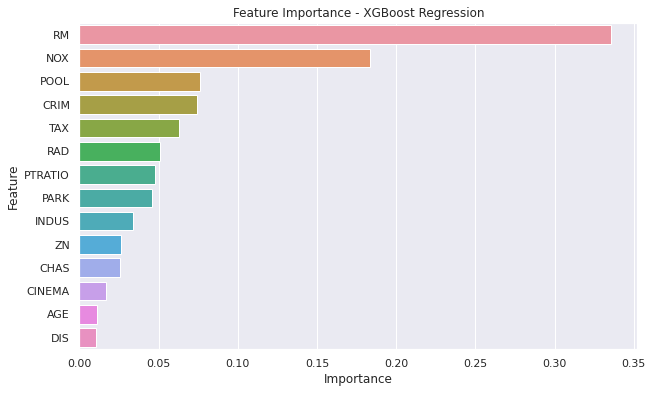

In [286]:
feature_importance_reg = regressor_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_reg = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_reg})

# Sort the DataFrame by importance score
feature_importance_df_reg = feature_importance_df_reg.sort_values('Importance', ascending=False)

# Plot feature importance for regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_reg)
plt.title('Feature Importance - XGBoost Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [40]:
y_train_classification = [1 if price > normalised_threshold else 0 for price in y_train]
# Create the XGBoost classifier model
params = {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
classifier_gb = xgb.XGBClassifier(gpu_id=3, ** params)



In [41]:
# Fit the model on the training set
classifier_gb.fit(X_train, y_train_classification)

[04:06:03] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_features='sqrt',
              max_leaves=None, min_child_weight=None, min_samples_leaf=4,
              min_samples_split=2, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, ...)

In [281]:
# y_pred_test_classification = [1 if price > normalised_threshold else 0 for price in y_pred_test_regression] # using the regressor 

In [282]:

# Make predictions on the test set
y_pred_test_classification = classifier_gb.predict(X_test)
# Evaluate the classifier model
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)
recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)
f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.83
Precision: 0.7361111111111112
Recall: 0.7794117647058824
F1 Score: 0.7571428571428572


In [283]:
# Calculate classification accuracy
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification)

# Print the classification accuracy and confusion matrix
print("Classification Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Classification Accuracy: 0.83
Confusion Matrix:
[[113  19]
 [ 15  53]]


Text(0.5, 21.5, 'Predicted label')

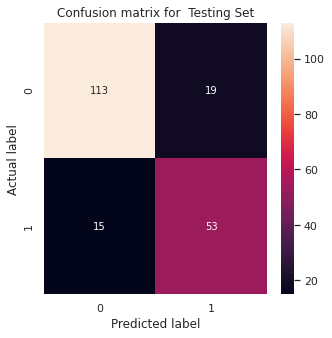

In [284]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format(' Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

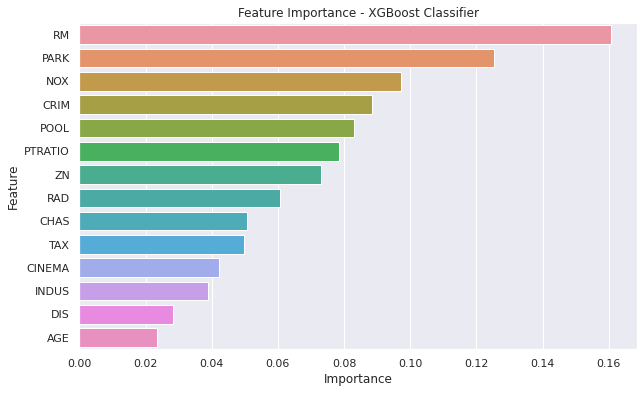

In [287]:
# Get feature importance
feature_importance_clf = classifier_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_clf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_clf})

# Sort the DataFrame by importance score
feature_importance_df_clf = feature_importance_df_clf.sort_values('Importance', ascending=False)

# Plot feature importance for classification
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_clf)
plt.title('Feature Importance - XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create the Logistic Regression classifier model
classifier_lr = LogisticRegression()

# Fit the model on the training set
classifier_lr.fit(X_train, y_train_classification)

# Make predictions on the test set
y_pred_test_classification = classifier_lr.predict(X_test)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test = classifier_lr.predict_proba(X_test)[:, 1]

# Evaluate the classifier model
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification, pos_label=1)
recall = recall_score(y_test_classification, y_pred_test_classification, pos_label=1)
f1 = f1_score(y_test_classification, y_pred_test_classification, pos_label=1)
roc_auc = roc_auc_score(y_test_classification, y_pred_proba_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.85
Precision: 0.8166666666666667
Recall: 0.7205882352941176
F1 Score: 0.7656250000000001
ROC AUC Score: 0.9163324420677361


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Logistic Regression classifier model
classifier_lr = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')

# Fit the model on the scaled training set
classifier_lr.fit(X_train_scaled, y_train_classification)

# Make predictions on the scaled test set
y_pred_test_classification = classifier_lr.predict(X_test_scaled)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test = classifier_lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate the classifier model
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification)
recall = recall_score(y_test_classification, y_pred_test_classification)
f1 = f1_score(y_test_classification, y_pred_test_classification)
roc_auc = roc_auc_score(y_test_classification, y_pred_proba_test)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)



Accuracy: 0.845
Precision: 0.7761194029850746
Recall: 0.7647058823529411
F1 Score: 0.7703703703703704
ROC AUC Score: 0.930926916221034


In [313]:
# Get the absolute coefficients
coefficients = np.abs(classifier_lr.coef_[0])

# Create a feature importance DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importance
print("Feature Importance - Logistic Regression:")
print(feature_importance_df)

Feature Importance - Logistic Regression:
    Feature  Importance
5        RM    1.190806
4       NOX    0.950578
9       TAX    0.850099
8       RAD    0.845548
0      CRIM    0.784336
11     PARK    0.514101
1        ZN    0.426001
10  PTRATIO    0.401236
12     POOL    0.324386
13   CINEMA    0.263278
3      CHAS    0.174469
6       AGE    0.019474
2     INDUS    0.018202
7       DIS    0.000000


In [316]:
from scipy import stats

In [318]:
# Get the coefficients
coefficients = classifier_lr.coef_[0]

# Calculate the standard errors
X_train_pred = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
y_train_pred = classifier_lr.predict(X_train)
residuals = y_train_classification - y_train_pred
sse = np.sum(residuals ** 2)
mse = sse / (X_train_pred.shape[0] - X_train_pred.shape[1])
cov_matrix = np.linalg.inv(np.dot(X_train_pred.T, X_train_pred)) * mse
standard_errors = np.sqrt(np.diag(cov_matrix)[1:])

# Calculate the t-statistics
t_stats = coefficients / standard_errors

# Calculate the p-values
p_values = 2 * (1 - stats.norm.cdf(np.abs(t_stats)))

# Create a DataFrame for the coefficients, t-stats, and p-values
results_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients,
                           'T-statistic': t_stats, 'P-value': p_values})

# Print the results
print("Logistic Regression Results:")
print(results_df)

Logistic Regression Results:
    Feature  Coefficient  T-statistic       P-value
0      CRIM    -0.784336    -5.837286  5.305791e-09
1        ZN     0.426001     4.517972  6.243488e-06
2     INDUS     0.018202     0.169349  8.655225e-01
3      CHAS     0.174469     2.364030  1.807735e-02
4       NOX    -0.950578    -5.592298  2.240835e-08
5        RM     1.190806     5.555761  2.764054e-08
6       AGE    -0.019474    -0.244217  8.070630e-01
7       DIS     0.000000     0.000000  1.000000e+00
8       RAD     0.845548    13.933437  0.000000e+00
9       TAX    -0.850099    -9.344205  0.000000e+00
10  PTRATIO    -0.401236    -3.540269  3.997187e-04
11     PARK     0.514101    12.219672  0.000000e+00
12     POOL     0.324386     7.301479  2.846612e-13
13   CINEMA    -0.263278    -6.766316  1.321032e-11


/users-2/billy/miniconda3/envs/pc_env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [311]:
# Make predictions on the test set
# y_pred_test_classification = classifier_lr.predict(X_test)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test = classifier_lr.predict_proba(X_test_scaled)[:, 1]

# Evaluate the classifier model
accuracy = accuracy_score(y_test_classification, y_pred_test_classification)
precision = precision_score(y_test_classification, y_pred_test_classification)
recall = recall_score(y_test_classification, y_pred_test_classification)
f1 = f1_score(y_test_classification, y_pred_test_classification)
roc_auc = roc_auc_score(y_test_classification, y_pred_proba_test)
classification_rep = classification_report(y_test_classification, y_pred_test_classification)
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification)

# Print the evaluation metrics and details
print("Evaluation Metrics - Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)

Evaluation Metrics - Logistic Regression:
Accuracy: 0.845
Precision: 0.7761194029850746
Recall: 0.7647058823529411
F1 Score: 0.7703703703703704
ROC AUC Score: 0.9310383244206774

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       132
           1       0.78      0.76      0.77        68

    accuracy                           0.84       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:
[[117  15]
 [ 16  52]]


Text(0.5, 21.5, 'Predicted label')

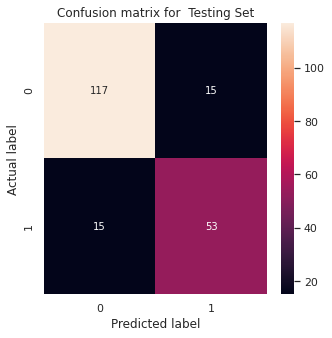

In [308]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format(' Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Create the Gradient Boosting Classifier
classifier_gb = GradientBoostingClassifier()

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [300],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_features': ['sqrt'],
    'random_state': [42]
}

In [43]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=classifier_gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training set
grid_search_gb.fit(X_train, y_train_classification)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4],
                         'min_samples_split': [2], 'n_estimators': [300],
                         'random_state': [42]},
             scoring='accuracy')

In [47]:
# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_test_classification_gb = best_estimator_gb.predict(X_test)

# Calculate predicted probabilities for ROC AUC score
y_pred_proba_test_gb = best_estimator_gb.predict_proba(X_test)[:, 1]

# Evaluate the classifier model
accuracy_gb = accuracy_score(y_test_classification, y_pred_test_classification_gb)
precision_gb = precision_score(y_test_classification, y_pred_test_classification_gb)
recall_gb = recall_score(y_test_classification, y_pred_test_classification_gb)
f1_gb = f1_score(y_test_classification, y_pred_test_classification_gb)
roc_auc_gb = roc_auc_score(y_test_classification, y_pred_proba_test_gb)
classification_rep_gb = classification_report(y_test_classification, y_pred_test_classification_gb)

# Print the evaluation metrics and best parameters
print("Gradient Boosting Classifier - Best Parameters:")
print(best_params_gb)
print("\nEvaluation Metrics - Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("ROC AUC Score:", roc_auc_gb)
print("\nClassification Report - Gradient Boosting Classifier:")
print(classification_rep_gb)

Gradient Boosting Classifier - Best Parameters:
{'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}

Evaluation Metrics - Gradient Boosting Classifier:
Accuracy: 0.865
Precision: 0.7971014492753623
Recall: 0.8088235294117647
F1 Score: 0.8029197080291971
ROC AUC Score: 0.9281417112299466

Classification Report - Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       132
           1       0.80      0.81      0.80        68

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.87      0.86      0.87       200



In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

In [64]:
mcc = matthews_corrcoef(y_test_classification, y_pred_test_classification_gb)

In [65]:
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.7003095834071643


In [49]:
# Create the input data as a DataFrame
input_data = pd.DataFrame({
    'CRIM': [0.25],
    'ZN': [0],
    'INDUS': [19.2],
    'CHAS': [1],
    'NOX': [0.3],
    'RM': [5.9],
    'AGE': [18.5],
    'DIS': [3.3],
    'RAD': [4],
    'TAX': [357],
    'PTRATIO': [21.0],
    'PARK': [1],
    'POOL': [0],
    'CINEMA': [1]
})




In [56]:
# Select the subset of columns to standardize
columns_to_standardize = list(input_data.keys())

# Standardize the input data
input_data_standardized = (input_data[columns_to_standardize] - dataset[columns_to_standardize].min()) / (dataset[columns_to_standardize].max() - dataset[columns_to_standardize].min())

# Combine the standardized columns with the remaining columns
input_data_standardized = pd.concat([input_data_standardized, input_data.drop(columns_to_standardize, axis=1)], axis=1)

In [66]:
# Classify the median house price as "high" or "low" using the XGBoost classifier
predicted_class = best_estimator_gb.predict(input_data_standardized)
if predicted_class == 1:
    print("Predicted Price Category: High")
else:
    print("Predicted Price Category: Low")

Predicted Price Category: Low


In [68]:
best_estimator_gb.predict_proba((input_data_standardized))

array([[0.52781396, 0.47218604]])

In [52]:
confusion_mat = confusion_matrix(y_test_classification, y_pred_test_classification_gb)

In [67]:
predicted_class

array([0])

In [55]:
confusion_mat

array([[118,  14],
       [ 13,  55]])

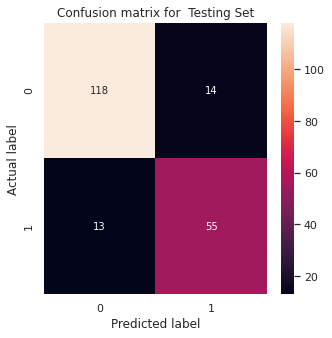

In [54]:
%matplotlib inline
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.title('Confusion matrix for {}'.format(' Testing Set'))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('xgb_matrix.png')

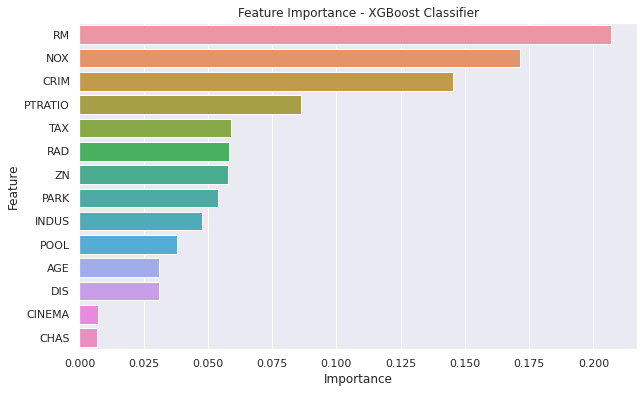

In [59]:
# Get feature importance
feature_importance_clf = best_estimator_gb.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_clf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_clf})

# Sort the DataFrame by importance score
feature_importance_df_clf = feature_importance_df_clf.sort_values('Importance', ascending=False)

# Plot feature importance for classification
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_clf)
plt.title('Feature Importance - XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_improt_XG_classifier.png')

In [62]:
# Get feature importance
feature_importance = best_estimator_gb.feature_importances_

# Print feature importance
print("Feature Importance for XGBoost Classifier:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance for XGBoost Classifier:
CRIM: 0.14518542951189944
ZN: 0.05778055563613904
INDUS: 0.04765311372480068
CHAS: 0.00691440519919817
NOX: 0.17158888441586315
RM: 0.20680655604960982
AGE: 0.03091993722667508
DIS: 0.030819441585595454
RAD: 0.05802144722545343
TAX: 0.05896287073870581
PTRATIO: 0.08615268282394074
PARK: 0.05402610223561011
POOL: 0.03779526225980015
CINEMA: 0.0073733113667089215


In [323]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the Gradient Boosting Regressor
regressor_gb = GradientBoostingRegressor()

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

In [325]:
# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=regressor_gb, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training set
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [330]:
# Get the best parameters and best estimator
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_

# Make predictions on the test set using the best estimator
y_pred_test_regression_gb = best_estimator_gb.predict(X_test)

# Evaluate the regressor model
mse_gb = mean_squared_error(y_test, y_pred_test_regression_gb)
mae_gb = mean_absolute_error(y_test, y_pred_test_regression_gb)
r2_gb = r2_score(y_test, y_pred_test_regression_gb)

# Print the evaluation metrics and best parameters
print("Gradient Boosting Regressor - Best Parameters:")
print(best_params_gb)
print("\nEvaluation Metrics - Gradient Boosting Regressor:")
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R-squared (R2) Score:", r2_gb)

Gradient Boosting Regressor - Best Parameters:
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 42}

Evaluation Metrics - Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.1364075126829236
Mean Absolute Error (MAE): 0.28643284579246936
R-squared (R2) Score: 0.8775292324769126


In [333]:
# XGB

In [ ]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Create the XGBoost Regressor
# regressor_xgb = XGBRegressor()

# # Define the parameter grid for GridSearchCV
# param_grid_xgb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2, 4],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'random_state': [42]
# }


In [ ]:
# # Create the GridSearchCV object
# grid_search_xgb = GridSearchCV(estimator=regressor_xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# # Fit the GridSearchCV on the training set
# grid_search_xgb.fit(X_train, y_train)

# # Get the best parameters and best estimator
# best_params_xgb = grid_search_xgb.best_params_
# best_estimator_xgb = grid_search_xgb.best_estimator_

# # Make predictions on the test set using the best estimator
# y_pred_test_regression_xgb = best_estimator_xgb.predict(X_test)

# # Evaluate the regressor model
# mse_xgb = mean_squared_error(y_test, y_pred_test_regression_xgb)
# mae_xgb = mean_absolute_error(y_test, y_pred_test_regression_xgb)
# r2_xgb = r2_score(y_test, y_pred_test_regression_xgb)

# # Print the evaluation metrics and best parameters
# print("XGBoost Regressor - Best Parameters:")
# print(best_params_xgb)
# print("\nEvaluation Metrics - XGBoost Regressor:")
# print("Mean Squared Error (MSE):", mse_xgb)
# print("Mean Absolute Error (MAE):", mae_xgb)
# print("R-squared (R2) Score:", r2_xgb)